# Nitrogen Oxides(NOx) Level Analysis in Air Quality  

### Attribute Information:

0 Date	(DD/MM/YYYY)<br>
1 Time	(HH.MM.SS) <br>
2 True hourly averaged concentration CO in mg/m^3 (reference analyzer) <br>
3 PT08.S1 (tin oxide) hourly averaged sensor response (nominally CO targeted)<br>
4 True hourly averaged overall Non Metanic HydroCarbons concentration in microg/m^3 (reference analyzer) <br>
5 True hourly averaged Benzene concentration in microg/m^3 (reference analyzer) <br>
6 PT08.S2 (titania) hourly averaged sensor response (nominally NMHC targeted)	<br>
7 True hourly averaged NOx concentration in ppb (reference analyzer) <br>
8 PT08.S3 (tungsten oxide) hourly averaged sensor response (nominally NOx targeted) <br>
9 True hourly averaged NO2 concentration in microg/m^3 (reference analyzer)	<br>
10 PT08.S4 (tungsten oxide) hourly averaged sensor response (nominally NO2 targeted)<br>
11 PT08.S5 (indium oxide) hourly averaged sensor response (nominally O3 targeted) <br>
12 Temperature in Â°C	<br>
13 Relative Humidity (%) <br>
14 AH Absolute Humidity <br>



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('AQI_datasets/UCI_AQI/AirQualityUCI.csv', sep=',', delimiter=";",decimal=",")

## Data Cleaning

In [3]:
data = data.drop(["Unnamed: 15","Unnamed: 16"], axis=1) 

In [4]:
data.head()

,Date,Time,CO_GT,PT08_S1_CO,NMHC_GT,C6H6_GT,PT08_S2_NMHC,NOx_GT,PT08_S3_NOx,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          9357 non-null   object 
 1   Time          9357 non-null   object 
 2   CO_GT         9357 non-null   float64
 3   PT08_S1_CO    9357 non-null   float64
 4   NMHC_GT       9357 non-null   float64
 5   C6H6_GT       9357 non-null   float64
 6   PT08_S2_NMHC  9357 non-null   float64
 7   NOx_GT        9357 non-null   float64
 8   PT08_S3_NOx   9357 non-null   float64
 9   NO2_GT        9357 non-null   float64
 10  PT08_S4_NO2   9357 non-null   float64
 11  PT08_S5_O3    9357 non-null   float64
 12  T             9357 non-null   float64
 13  RH            9357 non-null   float64
 14  AH            9357 non-null   float64
dtypes: float64(13), object(2)
memory usage: 1.1+ MB


In [6]:
## this gives all the null values in the table
#data[data.isnull().any(axis=1)]

data.isnull().any()

Date            True
Time            True
CO_GT           True
PT08_S1_CO      True
NMHC_GT         True
C6H6_GT         True
PT08_S2_NMHC    True
NOx_GT          True
PT08_S3_NOx     True
NO2_GT          True
PT08_S4_NO2     True
PT08_S5_O3      True
T               True
RH              True
AH              True
dtype: bool

In [7]:
data.isnull().sum()

Date            114
Time            114
CO_GT           114
PT08_S1_CO      114
NMHC_GT         114
C6H6_GT         114
PT08_S2_NMHC    114
NOx_GT          114
PT08_S3_NOx     114
NO2_GT          114
PT08_S4_NO2     114
PT08_S5_O3      114
T               114
RH              114
AH              114
dtype: int64

In [8]:
data.dropna(inplace=True)
data.set_index("Date", inplace=True)
data.index = pd.to_datetime(data.index)
type(data.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [9]:
data['Time'] = pd.to_datetime(data['Time'],format= '%H.%M.%S').dt.hour
type(data['Time'][0])

numpy.int64

In [10]:
data.head()

,Time,CO_GT,PT08_S1_CO,NMHC_GT,C6H6_GT,PT08_S2_NMHC,NOx_GT,PT08_S3_NOx,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH
Date,,,,,,,,,,,,,,
2004-10-03,18,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
2004-10-03,19,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2004-10-03,20,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
2004-10-03,21,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
2004-10-03,22,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9357 entries, 2004-10-03 to 2005-04-04
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Time          9357 non-null   int64  
 1   CO_GT         9357 non-null   float64
 2   PT08_S1_CO    9357 non-null   float64
 3   NMHC_GT       9357 non-null   float64
 4   C6H6_GT       9357 non-null   float64
 5   PT08_S2_NMHC  9357 non-null   float64
 6   NOx_GT        9357 non-null   float64
 7   PT08_S3_NOx   9357 non-null   float64
 8   NO2_GT        9357 non-null   float64
 9   PT08_S4_NO2   9357 non-null   float64
 10  PT08_S5_O3    9357 non-null   float64
 11  T             9357 non-null   float64
 12  RH            9357 non-null   float64
 13  AH            9357 non-null   float64
dtypes: float64(13), int64(1)
memory usage: 1.4 MB


In [12]:
data.describe()

,Time,CO_GT,PT08_S1_CO,NMHC_GT,C6H6_GT,PT08_S2_NMHC,NOx_GT,PT08_S3_NOx,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,11.498557,-34.207524,1048.990061,-159.090093,1.865683,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032,9.778305,39.485380,-6.837604
std,6.923182,77.657170,329.832710,139.789093,41.380206,342.333252,257.433866,321.993552,126.940455,467.210125,456.938184,43.203623,51.216145,38.976670
min,0.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,5.000000,0.600000,921.000000,-200.000000,4.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000,10.900000,34.100000,0.692300
50%,11.000000,1.500000,1053.000000,-200.000000,7.900000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000,17.200000,48.600000,0.976800
75%,18.000000,2.600000,1221.000000,-200.000000,13.600000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,24.100000,61.900000,1.296200
max,23.000000,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000


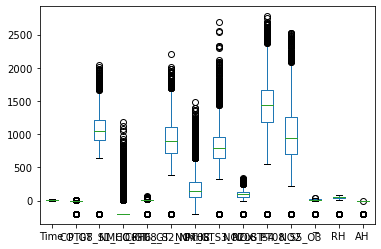

In [13]:
data.plot.box()

In [14]:
data.apply(lambda x : x == -200).sum()

Time               0
CO_GT           1683
PT08_S1_CO       366
NMHC_GT         8443
C6H6_GT          366
PT08_S2_NMHC     366
NOx_GT          1639
PT08_S3_NOx      366
NO2_GT          1642
PT08_S4_NO2      366
PT08_S5_O3       366
T                366
RH               366
AH               366
dtype: int64

In [16]:
data.drop('NMHC_GT', axis=1, inplace=True)

In [17]:
data.replace(to_replace= -200, value= np.NaN, inplace= True)

In [18]:
def remove_outlier(col):
    data[col] = data.groupby('Date')[col].transform(lambda x: x.fillna(x.mean()))

In [19]:
col_list = data.columns[1:]

for i in col_list:
    remove_outlier(i)


In [20]:
data.fillna(method='ffill', inplace= True)

In [21]:
data.isnull().any()

Time            False
CO_GT           False
PT08_S1_CO      False
C6H6_GT         False
PT08_S2_NMHC    False
NOx_GT          False
PT08_S3_NOx     False
NO2_GT          False
PT08_S4_NO2     False
PT08_S5_O3      False
T               False
RH              False
AH              False
dtype: bool

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9357 entries, 2004-10-03 to 2005-04-04
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Time          9357 non-null   int64  
 1   CO_GT         9357 non-null   float64
 2   PT08_S1_CO    9357 non-null   float64
 3   C6H6_GT       9357 non-null   float64
 4   PT08_S2_NMHC  9357 non-null   float64
 5   NOx_GT        9357 non-null   float64
 6   PT08_S3_NOx   9357 non-null   float64
 7   NO2_GT        9357 non-null   float64
 8   PT08_S4_NO2   9357 non-null   float64
 9   PT08_S5_O3    9357 non-null   float64
 10  T             9357 non-null   float64
 11  RH            9357 non-null   float64
 12  AH            9357 non-null   float64
dtypes: float64(12), int64(1)
memory usage: 1.3 MB


In [23]:
data.describe()

,Time,CO_GT,PT08_S1_CO,C6H6_GT,PT08_S2_NMHC,NOx_GT,PT08_S3_NOx,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,11.498557,2.082589,1099.748224,10.050981,937.915962,239.419651,835.378257,109.382418,1449.952952,1026.513193,18.167474,49.288300,1.018346
std,6.923182,1.383347,215.205784,7.368172,264.142162,200.833596,253.425632,46.058214,344.209200,398.438298,8.833685,17.200755,0.403606
min,0.000000,0.100000,647.000000,0.100000,383.000000,2.000000,322.000000,2.000000,551.000000,221.000000,-1.900000,9.200000,0.184700
25%,5.000000,1.100000,939.000000,4.500000,734.000000,102.000000,663.000000,76.000000,1223.000000,736.000000,11.500000,36.123529,0.727600
50%,11.000000,1.700000,1065.000000,8.200000,908.000000,177.000000,807.476190,103.608696,1454.000000,966.000000,17.600000,49.600000,0.988100
75%,18.000000,2.700000,1226.647059,14.000000,1118.000000,316.000000,967.000000,135.000000,1662.000000,1275.000000,24.300000,62.500000,1.309917
max,23.000000,11.900000,2040.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000


## Exploratory Data Analysis (EDA)

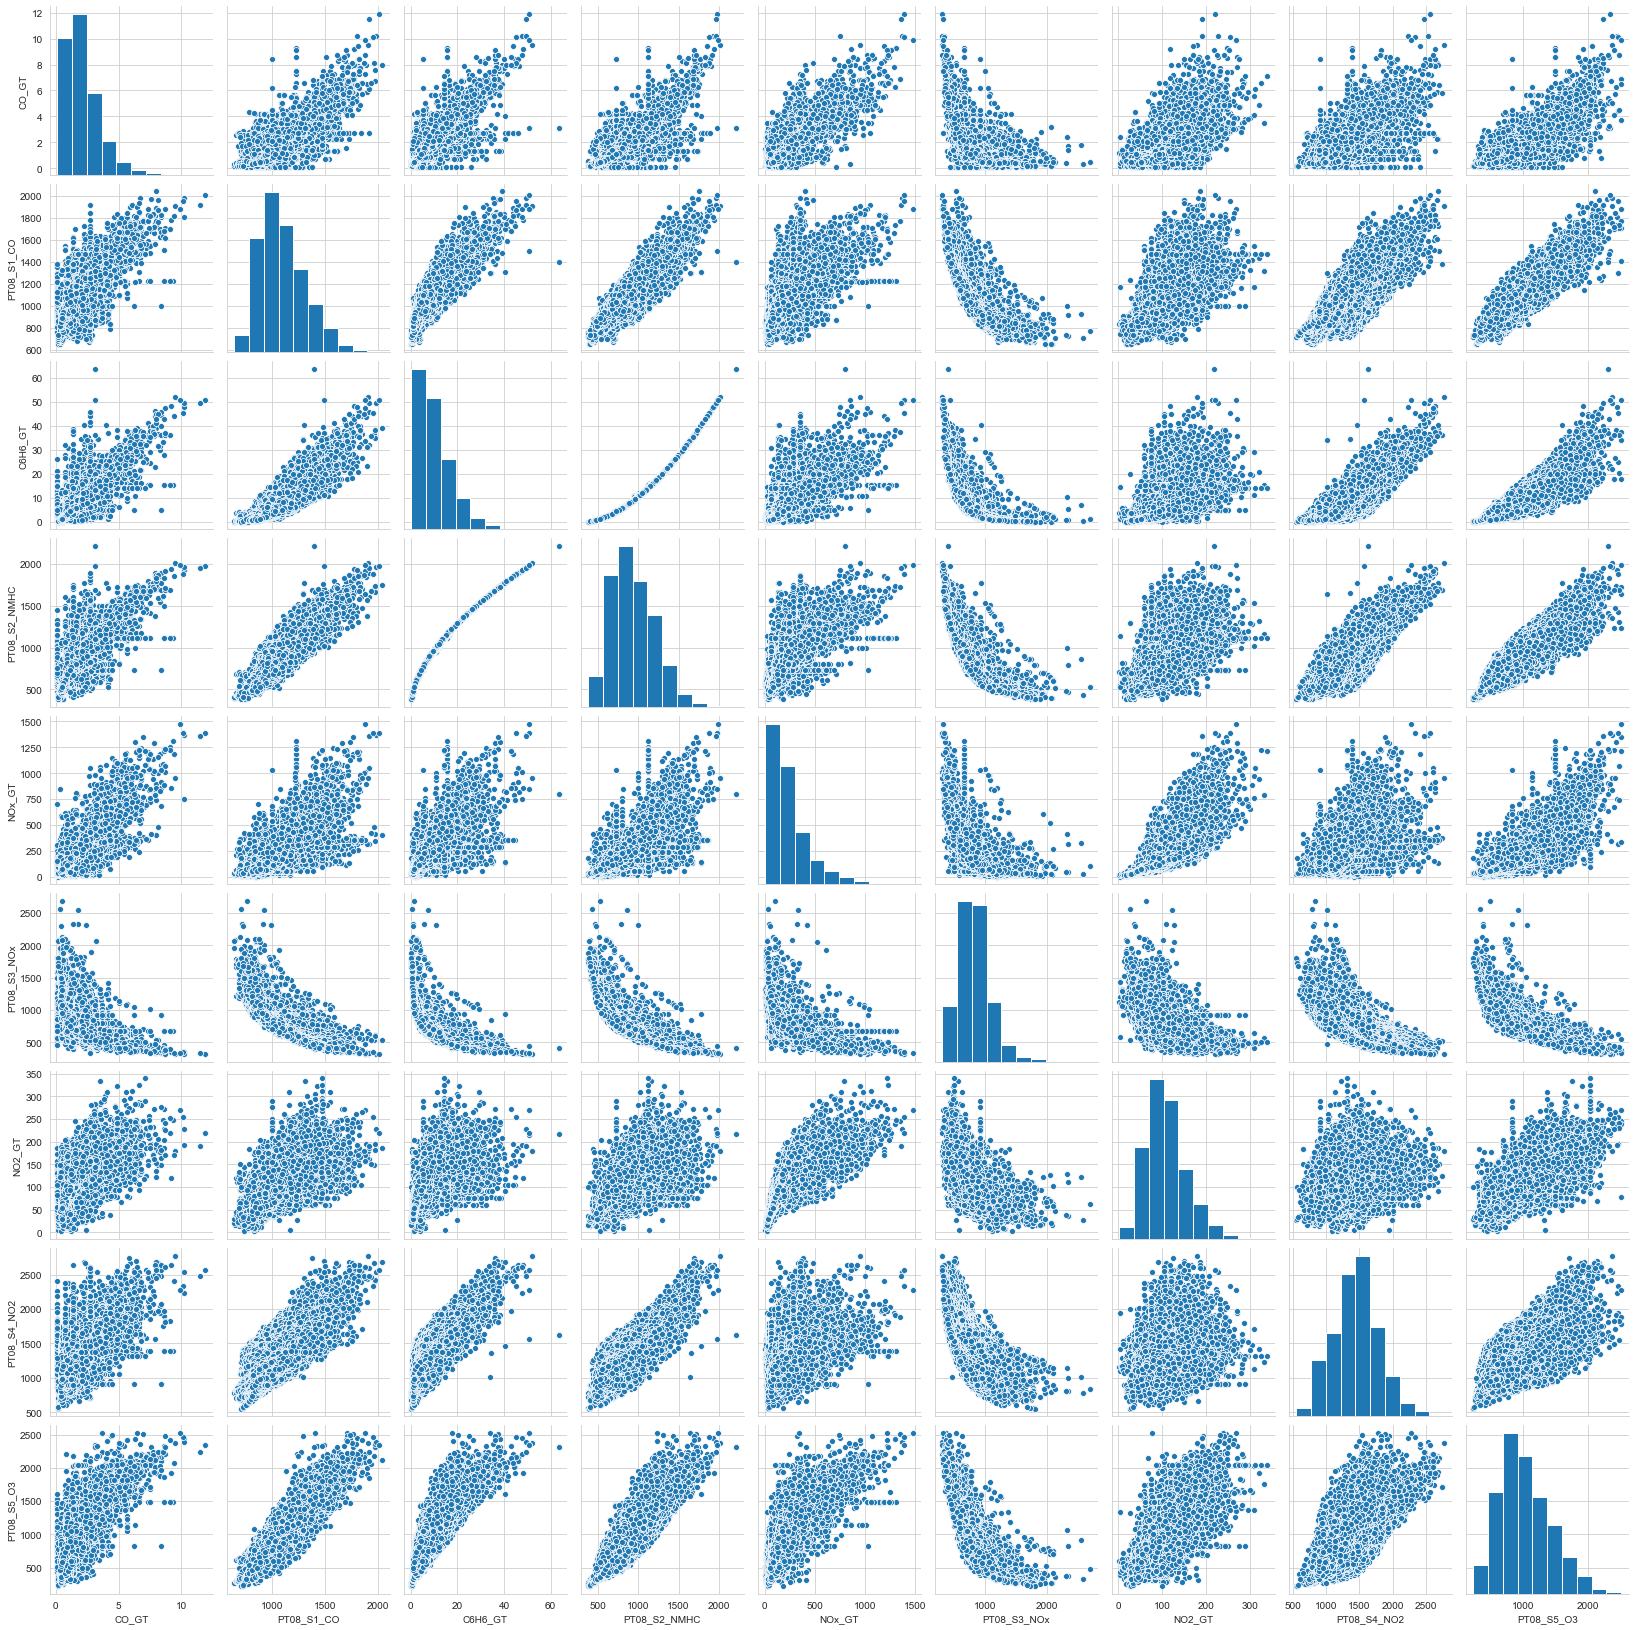

In [24]:
sns.set_style('whitegrid')
eda_data = data.drop(['Time','RH','AH','T'], axis=1)
sns.pairplot(eda_data)

Text(0, 0.5, 'All Toxic Gases in the Air')

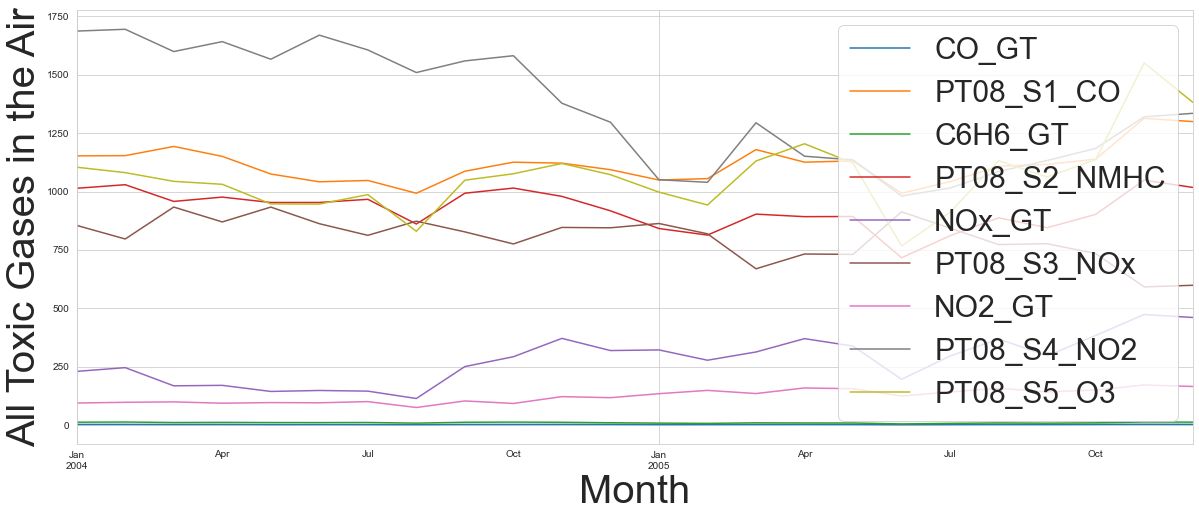

In [26]:

data.drop(['Time','RH','AH','T'], axis=1).resample('M').mean().plot(figsize = (20,8))
plt.legend(loc=1, fontsize = 30)
plt.xlabel('Month', fontsize = 40)
plt.ylabel('All Toxic Gases in the Air', fontsize = 40)
# plt.title("All Toxic Gases' Frequency by Month", fontsize = 40);

In the above graph, you can see the frequency of all toxics that is usually in polluted air. The Brown line shows Nitrogen Oxides (NOx) and Yellow line shows NO2 which is part of NOx. It is a mixture of gases are composed of nitrogen and oxygen. Two of the most toxicologically significant compounds are nitric oxide (NO) and nitrogen dioxide (NO2). I chose **Nitrogen Oxides(NOx)** because these are one of the most dangerous forms of air pollution and are most relevant for air pollution. However, There are many others ways to measure air pollution, including PM10 (particulate matter around between 2.5 and 10 microns in diameter), carbon monoxide, sulfur dioxide, nitrogen dioxide, ozone (O3), etc.


NOx is produced from the reaction of nitrogen and oxygen gases in the air during combustion, especially at high temperatures. In areas of high motor vehicle traffic, such as in large cities, the amount of nitrogen oxides emitted into the atmosphere as air pollution can be significant.


It is mainly due to fossil fuel combustion from both stationary sources, i.e. power generation (21%), and mobile sources, i.e. transport (44%). Other atmospheric contributions come from non-combustion processes, for example nitric acid manufacture, welding processes and the use of explosives.


In addition, these create serious health issues. These mainly impact on respiratory conditions causing inflammation of the airways at high levels. Long term exposure can decrease lung function, increase the risk of respiratory conditions and increases the response to allergens. NOx also contributes to the formation of fine particles (PM) and ground level ozone, both of which are associated with adverse health effects.

Ref: https://www.epa.gov/no2-pollution/basic-information-about-no2#Effects

In [25]:
data.columns

Index(['Time', 'CO(GT)', 'PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)',
       'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH',
       'AH'],
      dtype='object')

Text(0.5, 1.0, 'Mean Total Nitrogen Oxides (NOx) Level by Month')

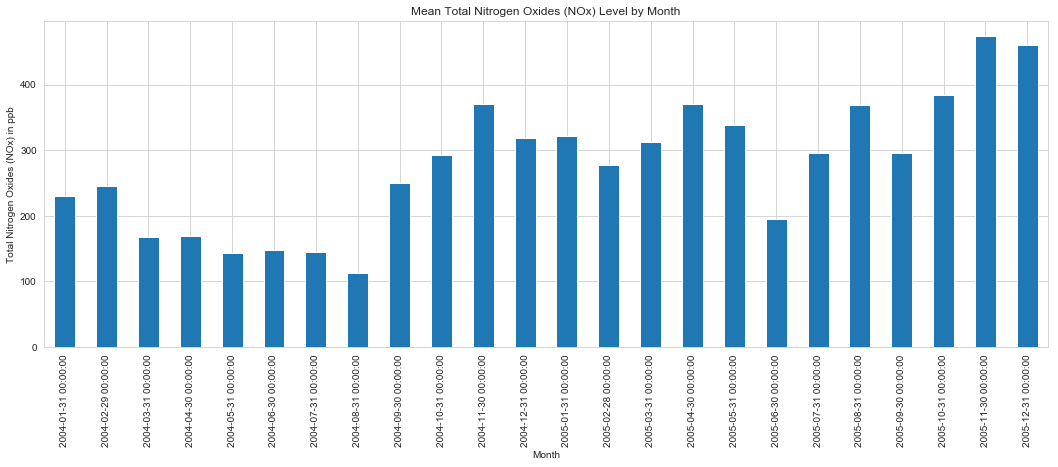

In [26]:
data['NOx(GT)'].resample('M').mean().plot(kind='bar', figsize=(18,6))
plt.xlabel('Month')
plt.ylabel('Total Nitrogen Oxides (NOx) in ppb')   # Parts per billion (ppb)
plt.title("Mean Total Nitrogen Oxides (NOx) Level by Month")

Here, we can see that frequency of Oxides of Nitrogen is increasing with little changes. 

Text(0.5, 1.0, 'Mean Total Nitrogen Oxides (NOx) Frequency During Days')

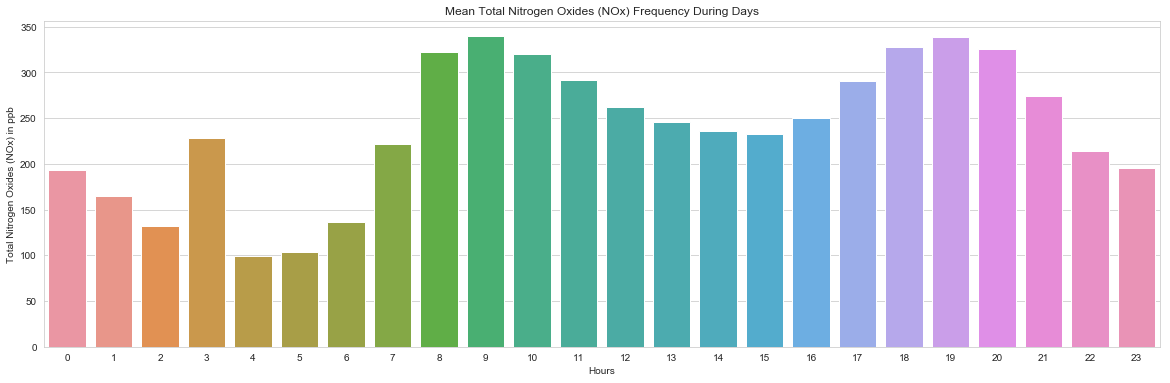

In [27]:
plt.figure(figsize=(20,6))
sns.barplot(x='Time',y='NOx(GT)',data=data, ci=False)
plt.xlabel('Hours')
plt.ylabel('Total Nitrogen Oxides (NOx) in ppb') # Parts per billion (ppb)
plt.title("Mean Total Nitrogen Oxides (NOx) Frequency During Days")

Here, the graph shows an average of Oxides of Nitrogen level with hours. It seems during the day, its level is high compared to night because of high use of transportations, phones, other electronics etc.


The Environmental Protection Agency (EPA) set a 1-hour NOx standard at the level of 100 parts per billion (ppb). (Ref: 
https://www.airnow.gov/index.cfm?action=pubs.aqiguidenox)

Here, this data shows, air has large amount of NOx compare to its standard measurement which is not good.

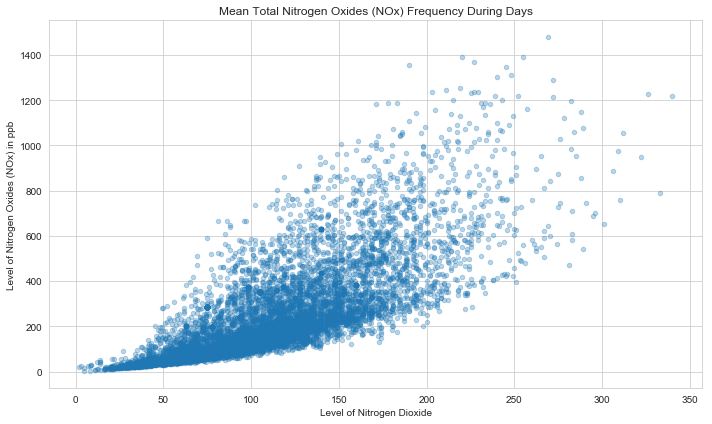

In [28]:

data.plot(x='NO2(GT)',y='NOx(GT)', kind='scatter', figsize = (10,6), alpha=0.3)
plt.xlabel('Level of Nitrogen Dioxide')
plt.ylabel('Level of Nitrogen Oxides (NOx) in ppb') # Parts per billion (ppb)
plt.title("Mean Total Nitrogen Oxides (NOx) Frequency During Days")
plt.tight_layout();

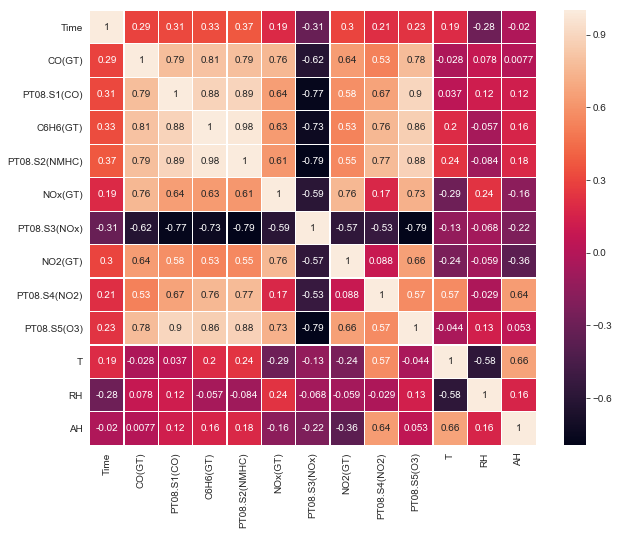

In [29]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=True, linewidths=.20)

## Training a Linear Regression Model
### X and y arrays

In [30]:
X = data.drop(['NOx(GT)','T','Time'], axis=1)

y= data['NOx(GT)']

### Train Test Split

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

### Creating and Training the Model

In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
lm = LinearRegression()

In [35]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

## Model Evaluation

In [36]:
print(lm.intercept_)

-50.15984568667167


In [37]:
coeff_data = pd.DataFrame(lm.coef_, index=X.columns, columns=['Coefficient'])
coeff_data

,Coefficient
CO(GT),49.814347
PT08.S1(CO),-0.069519
C6H6(GT),11.942804
PT08.S2(NMHC),0.257352
PT08.S3(NOx),0.086652
NO2(GT),1.487082
PT08.S4(NO2),-0.474876
PT08.S5(O3),0.066452
RH,2.277183
AH,170.649771


From above coefficient values, we can say:
if 1 unit increases in Benzene (C6H6), NOx increases by 12.66. Same as, if 1 unit increases in Nitrogen Dioxide(NO2) and Relative Humidity(RH), Oxides of Nitrogen will increase by 1.32 points and 2.49 points, respectively.

## Prediction Model

In [38]:
prediction = lm.predict(X_test)

Text(0.5, 1.0, 'Linear Regression Predicted vs Actual')

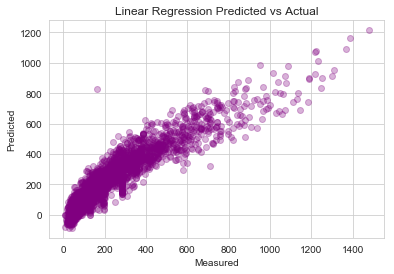

In [39]:
plt.scatter(y_test, prediction, c="purple", alpha=0.3)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Linear Regression Predicted vs Actual')

In [40]:
linear_regression_score = lm.score(X_test, y_test)
linear_regression_score

0.8513856922248191

### Residualt Histogram

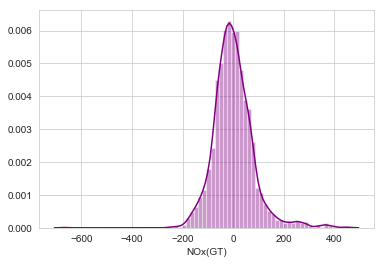

In [41]:
sns.distplot((y_test-prediction), bins=70, color="purple")

In [42]:
from sklearn import metrics

In [43]:
print('MAE:',metrics.mean_absolute_error(y_test, prediction))
print('MSE:',metrics.mean_squared_error(y_test, prediction))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 57.40341930660827
MSE: 6422.6892905022705
RMSE: 80.14168260338855


In [44]:
coeff_data

,Coefficient
CO(GT),49.814347
PT08.S1(CO),-0.069519
C6H6(GT),11.942804
PT08.S2(NMHC),0.257352
PT08.S3(NOx),0.086652
NO2(GT),1.487082
PT08.S4(NO2),-0.474876
PT08.S5(O3),0.066452
RH,2.277183
AH,170.649771


If we hold all other varibles constant and 1 point increases in CO(GT), NOx will increase by 49.81.
Simillarly, If we hold all other varibles constant and 1 point increases in NO2(GT), NOx will increase by 1.48.
and, If we hold all other varibles constant and 1 point increases in C6H6(GT), NOx will increase by 11.94.

For this Air quality data analysis, we saw that NOx's ppb are increasing due to the air pollution causing factors as mentioned above and badly affects our health and enviroment. Before it becomes too dangeous for us, There are several intiatives has been tried successfully and some of them are as follow:

- Switching fuel that has reduce low NOx emmision. For instance, No. 2 oil instead of No. 6, distillate oil and natual gas.
- Recircuclating flue gas which a waste gas produced at the power station and other big installation, with the combustion air supplied to the burners. This process of diluting the combustion air with flue gas, reduces both the oxygen concentration at the burners and the temperature and has reduced NOx emissions by 30 to 60%.
- Water Injection and Water Emulsion, in which water is added to reduce temperature of the combustion. Water is mixed with fuel at mounted of the cylinder to inject water. This method can reduce NOx by 20-45%


References:
- https://www.pollutiononline.com/doc/nox-emission-reduction-strategies-0001
- https://www.marineinsight.com/tech/10-technologiesmethods-for-controlling-nox-sox-emissions-from-ships/  
